In [1]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

# for numerical inegration
import scipy.integrate

# for pretty plots
import seaborn as sns
sns.set()


Bad key text.latex.preview in file /Users/sbeeler/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/sbeeler/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/sbeeler/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default 

# Problem 1

## (a)

We see that the only change here is for the rabbits, with the $-2y$ term becoming a $-y$ term. This term corresponds to the extent to which the sheep, $y$, negatively impact the rabbits, $x$. This change means that the rabbits are now less impacted by the competition with sheep, explaining why they are now able to always take over.

## (b)

Now the term that changed is the $-x$ term to $-2x$. Since this term corresponds competition between rabbits, and the strength of the competition is becoming stronger, this accounts for why the rabbits are no longer able to take over, and the sheep ultimately always take over.

## (c)

For the system of differential equations

\begin{align}
\dot x &= x(3-2x-y) \tag{1} \\[1em]
\dot y &= y(2-x-y) \tag{2}
\end{align}

we have a total of four fixed points:

1) $(0,0)$ is the clearest way to ensure that $\dot x = 0$ and $\dot y = 0$.
2) $(0, 2)$ arises from when $x=0$ in Equation (1) and $2-x-y=0$ in Equation (2)
3) $(\frac{3}{2},0)$ arises when $y=0$ in Equation (2) and $3-2x-y=0$ in Equation (1)
4) $(1,1)$ arises from solving the system of equations of $3-2x-y=0$ and $2-x-y=0$

## (d)

Modifying the code from class, where the only piece that changes is the definition of `dx_dt`.

In [2]:
def modified_rabbits_v_sheep_rhs(xy, t):
    """
    Right hand side for rabbits vs. sheep
    """
    # unpack the x and y values
    x, y = xy
    
    # Compute dx/dt
    dx_dt =  x*(3-2*x-y)
    
     # Compute dy/dt
    dy_dt =  y*(2-x-y)

    # Return the result as a NumPy array
    return np.array([dx_dt, dy_dt])

## (e)

We can now use `scipy` to integrate our modified rabbits vs. sheep function over time. 

Text(0, 0.5, 'sheep')

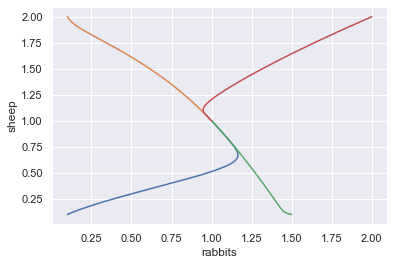

In [3]:
# Time points we want for the solution
t = np.linspace(0,20,1000)

# loop through differnt initial conditions
for xy_0 in ([0.1,0.1],
             [0.1,2],
             [1.5,0.1],
             [2,2,]):

    # Integrate ODES
    xy = scipy.integrate.odeint(modified_rabbits_v_sheep_rhs, xy_0, t)
    
    plt.plot(xy[:,0], xy[:,1])

plt.xlabel("rabbits")
plt.ylabel("sheep")

Even with starting from a wide range of initial conditions, they all lead toward the stable fixed point (1,1) we found in part (c).

# Problem 2

## (a) 

The $kxy$ term corresponds to the rate at which sick people, $y$, infect healthy people, $x$. This term is negative for $\dot x$ as this interaction results in the number of healthy people decline. Conversely, this term is positive for $\dot y$ as this interaction increases the number of sick people. 

The $ly$ term correspond to the rate at which sick people die. Again, this term is negative for $\dot y$ but positive for $\dot z$ as it corresponds to a loss of sick people, but a gain of dead people. 

## (b)

A more complete model might include a population of vaccinated people or a group of people who were previously sick, but have since recovered. These people might importantly have a different rate at which they become sick and/or a different rate at which they die were they to become sick. A more complete model might consider these nuances.

## (c)

In [4]:
def epi_rhs(xyz, t, k, l):
    """
    Right hand side for epidemic model
    """
    # Unpack x and y
    x,y,z = xyz
    
    # Compute dx/dt
    dx_dt = -k*x*y
    
    # Compute dy/dt
    dy_dt = k*x*y - l*y
    
    dz_dt = l*y
    
    #print(dx_dt,dy_dt,dz_dt)
    # Return the result as a NumPy array
    return np.array([dx_dt, dy_dt, dz_dt])

In [5]:
# Time points we want for the solution
t = np.linspace(0, 20, 1000)

# Initial condition
xyz_0 = np.array([99, 1, 0 ])

# Parameters
k = 0.01
l = 0.01

# Package parameters into a tuple
args = (k, l)

# Integrate ODES
xyz = scipy.integrate.odeint(epi_rhs, xyz_0, t, args=args)

## (d)

Text(0, 0.5, 'number of people')

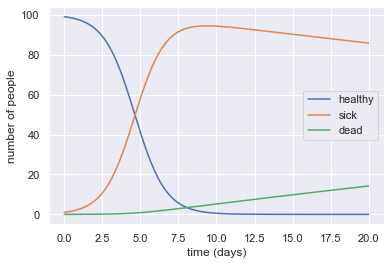

In [6]:
plt.plot(t, xyz);
plt.legend(["healthy", "sick", "dead"])
plt.xlabel("time (days)")
plt.ylabel("number of people")

Qualitatively, we see that the number of healthy people declines as the number of sick and dead people increases. This makes sense with how this model is set up, with there being no way for people to re-enter the healthy population.

## (e)

As mentioned at the start of the prompt, this model considers only a short time frame, where all deaths can be attributed to the epidemic and not other causes. A more complete model would allow for the birth of new healthy people, as well as the death of people due to other causes. In addition to the modifications mentioned in part (b), this would make for a more complete model of an epidemic. 

# Problem 3

## (a)

- The $aR$ term corresponds to the growth/birth of rabbits.
- The $-bRF$ term corresponds to the death of rabbits as a result of being preyed on by the foxes
- The $-cF$ term corresponds to the death of foxes, likely by natural causes.
- The $dRF$ term corresponds to the growth/birth of foxes as a result of preying on rabbits.

This model differs from rabbits vs. sheep, in that one population has a *positive* effect on the other. With the rabbits vs. sheep, they strictly competed with each other, with the existence of one always being to the detriment of the other.

## (b)

In [30]:
def LV_PP_rhs(xy, t, mu):
    """
    Right hand side for lotka-volterra, predator-prey model
    """
    
    # Unpack x and y
    x,y = xy
    
    # Compute dx/dt
    dx_dt = x*(1-y)
    
    # Compute dy/dt
    dy_dt = mu*y*(x-1)
    
    #print(dx_dt,dy_dt,dz_dt)
    # Return the result as a NumPy array
    return np.array([dx_dt, dy_dt])

In [34]:
# Time points we want for the solution
t = np.linspace(0, 100, 1000)

# Initial condition
xy_0 = np.array([2, 2])

# Parameters
mu=0.1

# Package parameters into a tuple
args = (mu,)

# Integrate ODES
xy = scipy.integrate.odeint(LV_PP_rhs, xy_0, t, args)

Text(0, 0.5, 'number')

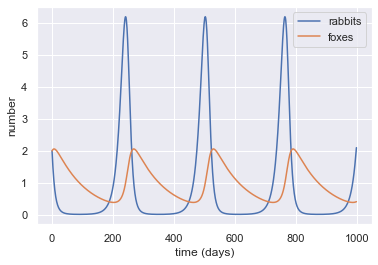

In [39]:
plt.plot(xy)
plt.legend(["rabbits","foxes"])
plt.xlabel("time (days)")
plt.ylabel("number")

Text(0, 0.5, 'foxes')

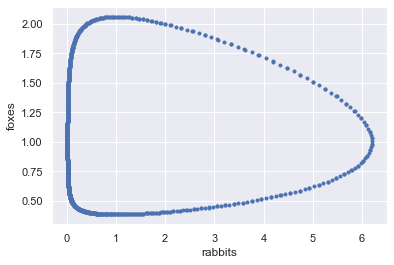

In [40]:
plt.plot(xy[:,0], xy[:,1], '.')
plt.xlabel("rabbits")
plt.ylabel("foxes")

## (c)

Extending from what we covered in part (a), these oscillation arises from the the opposing effects that rabbits and foxes have on each other. While foxes benefit from the rabbits, the rabbits are clearly negatively impacted by the foxes. These opposing effects cause oscillations as the foxes predate the rabbits. Initially there may be a large number of rabbits, allowing the foxes’ numbers to rise. But eventually the foxes will over-predate the rabbits, ultimately cause both their numbers to fall. Such oscillations are not possible in the case of the rabbits and the sheep since they both negatively impact each other. 